In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
cwd = os.getcwd()
# Read the data
used_dataset_dir = os.path.join(cwd, 'separated_merged')
cleaned_dataset_dir = os.path.join(cwd, 'cleaned_data')

# Read the data
weather_df_2022 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2022.csv'))
tidal_df_2022 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_22.csv'))
weather_df_2020 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2020.csv'))
tidal_df_2020 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_20.csv'))
weather_df_2019 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2019.csv'))
tidal_df_2019 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_19.csv'))


In [3]:
# Rename columns biar sama (Date)
weather_df_2022.rename(columns={'Time (UTC)': 'Date'}, inplace=True)
weather_df_2020.rename(columns={'Tanggal': 'Date'}, inplace=True)
weather_df_2019.rename(columns={'Tanggal': 'Date'}, inplace=True)

#drop tidal TIME (UTC) columns
tidal_df_2022.drop(columns=['Time (UTC)'], inplace=True)
tidal_df_2020.drop(columns=['Time (UTC)'], inplace=True)
#drop tidal 2019 TIME (UTC), bat(V), ras(m),sw1(min),sw2(min) columns
tidal_df_2019.drop(columns=['Time (UTC)'], inplace=True)
tidal_df_2019.drop(columns=['bat(V)'], inplace=True)
tidal_df_2019.drop(columns=['ras(m)'], inplace=True)
tidal_df_2019.drop(columns=['sw1(min)'], inplace=True)
tidal_df_2019.drop(columns=['sw2(min)'], inplace=True)

# convert Date data weather 2019 and 2020 menjadi  YYYY-MM-DD
weather_df_2020['Date'] = pd.to_datetime(weather_df_2020['Date'], format='%d-%m-%Y')
weather_df_2019['Date'] = pd.to_datetime(weather_df_2019['Date'], format='%d-%m-%Y')

#convert weather data menjadi datetime
weather_df_2022['Date'] = pd.to_datetime(weather_df_2022['Date'], errors='coerce')
weather_df_2020['Date'] = pd.to_datetime(weather_df_2020['Date'], errors='coerce')
weather_df_2019['Date'] = pd.to_datetime(weather_df_2019['Date'], errors='coerce')
#convert tidal data menjadi datetime
tidal_df_2022['Date'] = pd.to_datetime(tidal_df_2022['Date'], errors='coerce')
tidal_df_2020['Date'] = pd.to_datetime(tidal_df_2020['Date'], errors='coerce')
tidal_df_2019['Date'] = pd.to_datetime(tidal_df_2019['Date'], errors='coerce')


# Merge weather_df_2022 and weather_df_2020
merged_weather_df = pd.concat([weather_df_2022, weather_df_2020, weather_df_2019], ignore_index=True)
merged_tidal_df = pd.concat([tidal_df_2022, tidal_df_2020, tidal_df_2019], ignore_index=True)


# merge weather and tidal data
merged_df = pd.merge(merged_weather_df, merged_tidal_df, on='Date', how='inner')
display(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1071 non-null   datetime64[ns]
 1   Tn       1059 non-null   float64       
 2   Tx       1070 non-null   float64       
 3   Tavg     1061 non-null   float64       
 4   RH_avg   1061 non-null   float64       
 5   RR       1071 non-null   float64       
 6   ss       1066 non-null   object        
 7   ff_x     1070 non-null   object        
 8   ddd_x    1058 non-null   object        
 9   ff_avg   1036 non-null   object        
 10  ddd_car  635 non-null    object        
 11  rad(m)   1071 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 100.5+ KB


None

In [4]:

merged_data_sorted = merged_df.sort_values(by='Date')
merged_data_sorted.reset_index(drop=True, inplace=True)
display(merged_data_sorted.head())
display(merged_data_sorted.tail())
# Show the amount of merged_data_sorted
print(f'The number of rows in merged_data_sorted: {merged_data_sorted.shape[0]}')
print(f'The number of columns in merged_data_sorted: {merged_data_sorted.shape[1]}')

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,rad(m)
0,2019-01-01,25.4,33.5,28.0,84.0,3.4,8.0,8,230,5,W,0.101041
1,2019-01-02,25.8,30.0,27.4,82.0,1.3,6.9,8,290,6,W,0.133389
2,2019-01-03,25.6,31.0,28.4,74.0,0.3,0.0,10,290,4,NW,0.074654
3,2019-01-04,NaN,31.4,28.1,75.0,0.3,0.0,4,90,2,E,0.039048
4,2019-01-05,NaN,32.0,28.2,84.0,0.0,7.5,4,130,2,S,0.012082


,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,rad(m)
1066,2022-12-27,25.5,29.5,27.5,83.0,6.0,1.2,9.0,270.0,6.0,NaN,-0.024320
1067,2022-12-28,24.5,29.1,26.9,84.0,2.3,0.0,9.0,270.0,5.0,NaN,-0.030015
1068,2022-12-29,24.0,30.1,27.0,84.0,35.6,3.2,8.0,260.0,4.0,NaN,0.005127
1069,2022-12-30,25.9,30.0,27.6,83.0,1.0,4.9,7.0,310.0,3.0,NaN,-0.828327
1070,2022-12-31,24.9,32.2,27.7,83.0,0.0,0.6,7.0,280.0,3.0,NaN,-0.401817


The number of rows in merged_data_sorted: 1071
The number of columns in merged_data_sorted: 12


In [5]:
features_to_check = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ff_avg', 'rad(m)']

# Check for null values before processing
display("Initial null values:")
display(merged_data_sorted[features_to_check].isnull().sum())   

# Check the data types to identify 'object' columns
# print("Data types:")
# display(merged_data_sorted.dtypes)

# List of object columns that might need conversion
object_columns = ['ss', 'ff_x', 'ddd_x', 'ff_avg', 'rad(m)']

# Convert these columns to numeric, coerce invalid values to NaN
for col in object_columns:
    merged_data_sorted[col] = pd.to_numeric(merged_data_sorted[col], errors='coerce')

# Now check for null values after conversion

# Select only numeric columns for 'fillna'
numeric_columns = merged_data_sorted[features_to_check].select_dtypes(include=['float64', 'int64']).columns

# Replace NaN values in numeric columns with their mean
merged_data_sorted[numeric_columns] = merged_data_sorted[numeric_columns].fillna(merged_data_sorted[numeric_columns].mean())

# Check if there are still any NaN values
print("Final null values after filling:")
display(merged_data_sorted[features_to_check].isnull().sum())


'Initial null values:'

Tn        12
Tx         1
Tavg      10
RH_avg    10
ff_avg    35
rad(m)     0
dtype: int64

Final null values after filling:


Tn        0
Tx        0
Tavg      0
RH_avg    0
ff_avg    0
rad(m)    0
dtype: int64

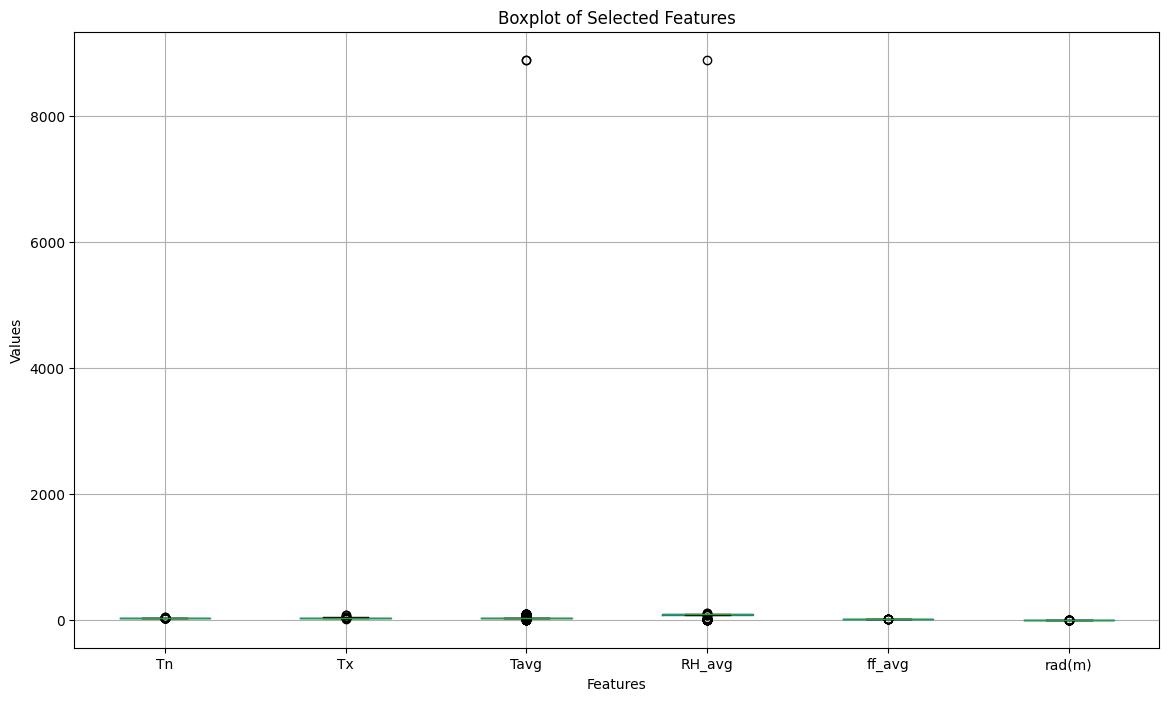

In [6]:
# Select the features to check for outliers

# Create a boxplot for each feature
plt.figure(figsize=(14, 8))
merged_data_sorted[features_to_check].boxplot()
plt.title('Boxplot of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [7]:
def calculate_z_scores_and_outliers(dataframe, numeric_columns):
    # Menghitung z-score untuk kolom numerik
    z_scores = dataframe[numeric_columns].apply(zscore)

    # Tentukan ambang batas untuk outlier
    outliers = (z_scores > 3) | (z_scores < -3)

    return outliers

def detect_outliers(dataframe, numeric_columns):
    Q1 = merged_data_sorted[features_to_check].quantile(0.25)
    Q3 = merged_data_sorted[features_to_check].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 3  # atau 2.5

    # Tentukan batas bawah dan atas untuk tiap kolom
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Outlier: nilai yang lebih kecil dari (Q1 - 1.5 * IQR) atau lebih besar dari (Q3 + 1.5 * IQR)
    outliers = (dataframe[numeric_columns] < lower_bound) | (dataframe[numeric_columns] > upper_bound)

    return outliers


# Call the function
outliers_z = calculate_z_scores_and_outliers(merged_data_sorted[features_to_check], numeric_columns)

# Call the function
outliers = detect_outliers(merged_data_sorted[features_to_check], numeric_columns)

print("Outliers using z-scores:")
display(outliers_z.sum())
print("Outliers using IQR:")
display(outliers.sum())

Outliers using z-scores:


Tn        26
Tx         3
Tavg       2
RH_avg     1
ff_avg    15
rad(m)    12
dtype: int64

Outliers using IQR:


Tn        13
Tx         3
Tavg      68
RH_avg    57
ff_avg     0
rad(m)     3
dtype: int64

In [8]:
display("Data before removing outliers:")   
display(merged_data_sorted.shape)

'Data before removing outliers:'

(1071, 12)

Fix Outlier

In [9]:
Q1 = merged_data_sorted[features_to_check].quantile(0.25)
Q3 = merged_data_sorted[features_to_check].quantile(0.75)
IQR = Q3 - Q1

threshold = 3  # atau 2.5

# Tentukan batas bawah dan atas untuk tiap kolom
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Ganti outlier dengan median hanya untuk kolom dalam features_to_check
for column in features_to_check:
    median = merged_data_sorted[column].median()
    
    # Cek apakah nilai lebih kecil dari batas bawah atau lebih besar dari batas atas
    outliers_mask = (merged_data_sorted[column] < lower_bound[column]) | (merged_data_sorted[column] > upper_bound[column])
    
    # Ganti outlier dengan median
    merged_data_sorted[column] = merged_data_sorted[column].where(~outliers_mask, median)

# Tampilkan data setelah penggantian
outliers_z = calculate_z_scores_and_outliers(merged_data_sorted, features_to_check)
outliers = detect_outliers(merged_data_sorted, features_to_check)

print("Outliers using z-scores:")
display(outliers_z.sum())
print("Outliers using IQR:")
display(outliers.sum())


Outliers using z-scores:


Tn        22
Tx         4
Tavg       6
RH_avg     8
ff_avg    15
rad(m)    11
dtype: int64

Outliers using IQR:


Tn        5
Tx        0
Tavg      0
RH_avg    0
ff_avg    0
rad(m)    1
dtype: int64

fix outliers using z-scores

In [10]:
# fix outliers using z-scores
# Calculate z-scores for the features
z_scores = merged_data_sorted[features_to_check].apply(zscore)

# Define a threshold for z-scores to identify outliers
threshold = 3

# Filter out the rows where any feature has a z-score greater than the threshold
merged_data_sorted = merged_data_sorted[(z_scores < threshold).all(axis=1)]

# Recalculate outliers after filtering
outliers_z = calculate_z_scores_and_outliers(merged_data_sorted, features_to_check)
outliers = detect_outliers(merged_data_sorted, features_to_check)

print("Outliers using z-scores:")
display(outliers_z.sum())
print("Outliers using IQR:")
display(outliers.sum())



Outliers using z-scores:


Tn        15
Tx         4
Tavg       5
RH_avg     3
ff_avg     0
rad(m)     0
dtype: int64

Outliers using IQR:


Tn        2
Tx        0
Tavg      0
RH_avg    0
ff_avg    0
rad(m)    0
dtype: int64

'Data after removing outliers:'

(1030, 12)

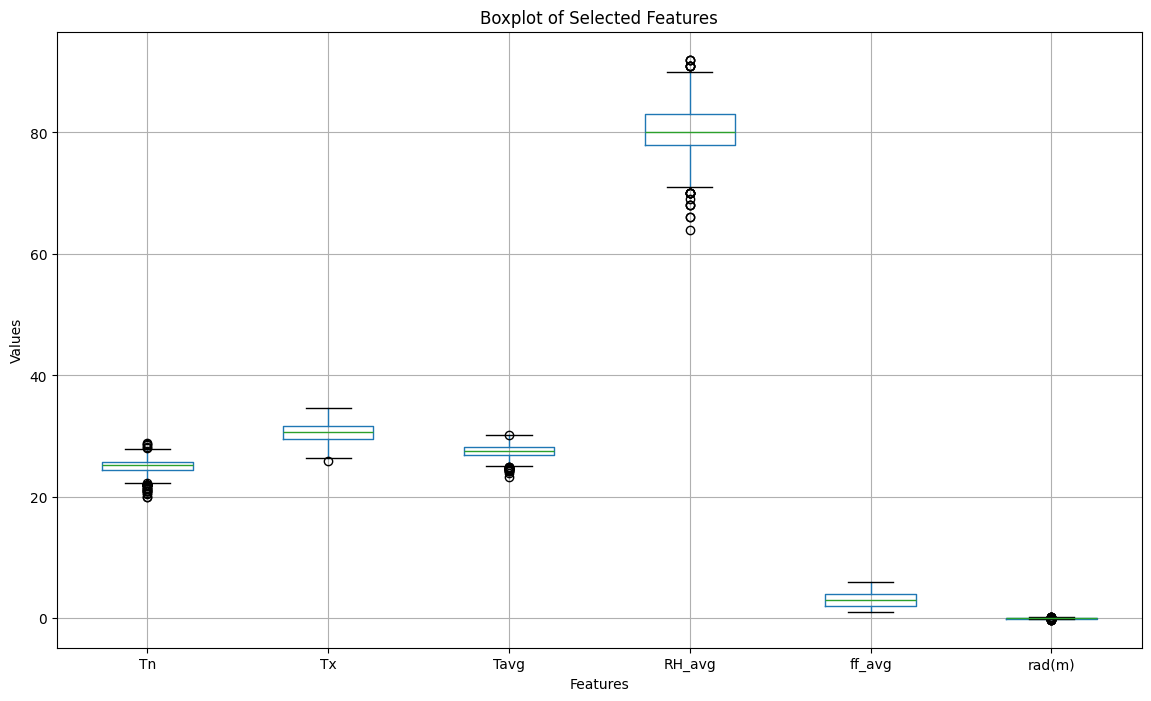

In [11]:
# Select the features to check for outliers
display("Data after removing outliers:")
display(merged_data_sorted.shape)

# Create a boxplot for each feature
plt.figure(figsize=(14, 8))
merged_data_sorted[features_to_check].boxplot()
plt.title('Boxplot of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Remove the outliers


In [12]:
display("Data before removing outliers:")   
display(merged_data_sorted.shape)

'Data before removing outliers:'

(1030, 12)

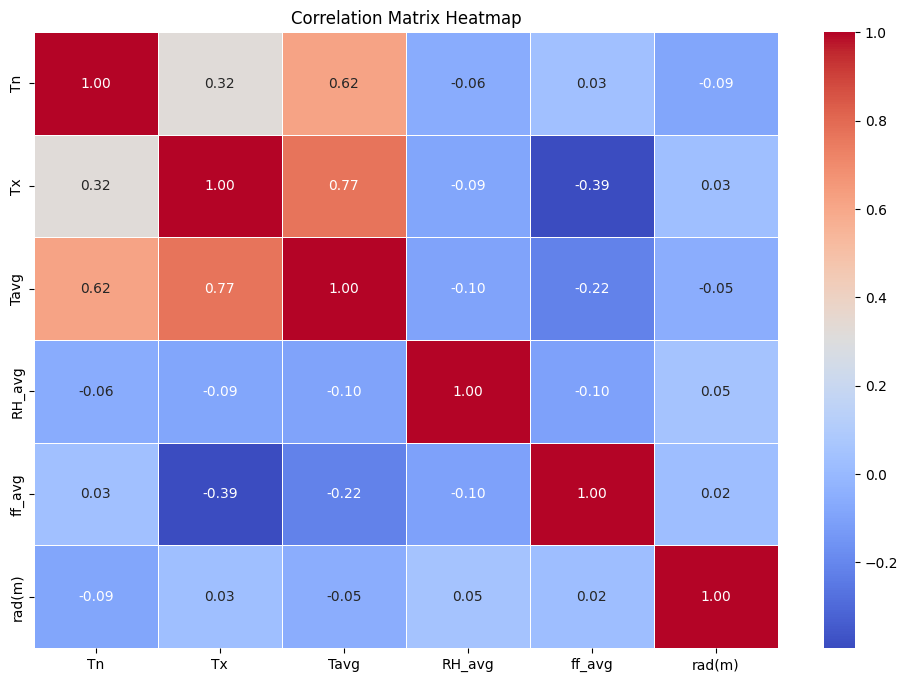

In [13]:
# Calculate the correlation matrix
correlation_matrix = merged_data_sorted[features_to_check].corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

Cleaned Merged


In [14]:
# Save the merged data to a new CSV file
merged_data_sorted.to_csv(os.path.join(cleaned_dataset_dir, 'used_cleaned_data.csv'), index=False)